In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')
balls = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [5]:
# Convert date to datetime format
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year

## 1. Perform basic analysis on IPL 

In [6]:
# Total number of matches
total_matches = matches.shape[0]

teams = pd.unique(matches[['team1', 'team2']].values.ravel('K'))
total_teams = len(teams)

team_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()

most_matches = team_matches.head()

top_venues = matches['venue'].value_counts().head()

In [7]:
print("Total Matches:", total_matches)
print("Total Unique Teams:", total_teams)
print("\nTop 5 Teams by Matches Played:\n", most_matches)
print("\nTop 5 Venues:\n", top_venues)

Total Matches: 816
Total Unique Teams: 15

Top 5 Teams by Matches Played:
 Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Name: count, dtype: int64

Top 5 Venues:
 venue
Eden Gardens                                 77
Feroz Shah Kotla                             74
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Rajiv Gandhi International Stadium, Uppal    64
Name: count, dtype: int64


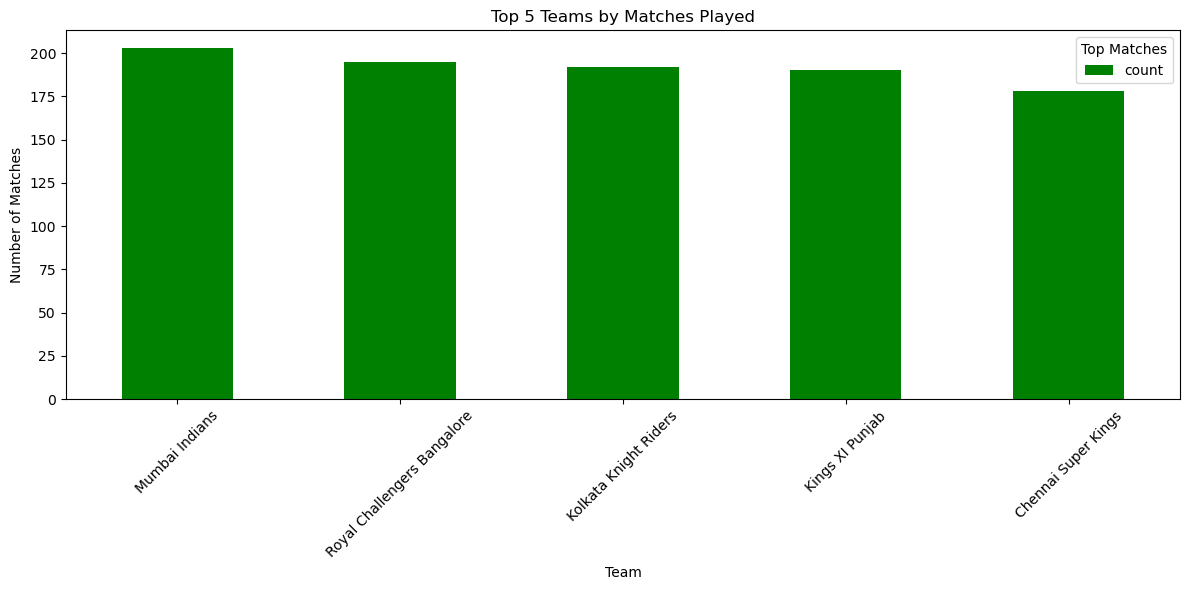

In [8]:
most_matches.plot(kind='bar', stacked=False, figsize=(12,6), color='Green')
plt.title('Top 5 Teams by Matches Played')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Top Matches')
plt.tight_layout()
plt.show()

## 2. Analyse toss decisions across seasons of IPL

In [9]:
# Group by season and toss decision
toss_decision_season = matches.groupby(['season', 'toss_decision']).size().unstack(fill_value=0)

print("Toss Decision Trends by Season:\n", toss_decision_season)


Toss Decision Trends by Season:
 toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50
2020            27     33


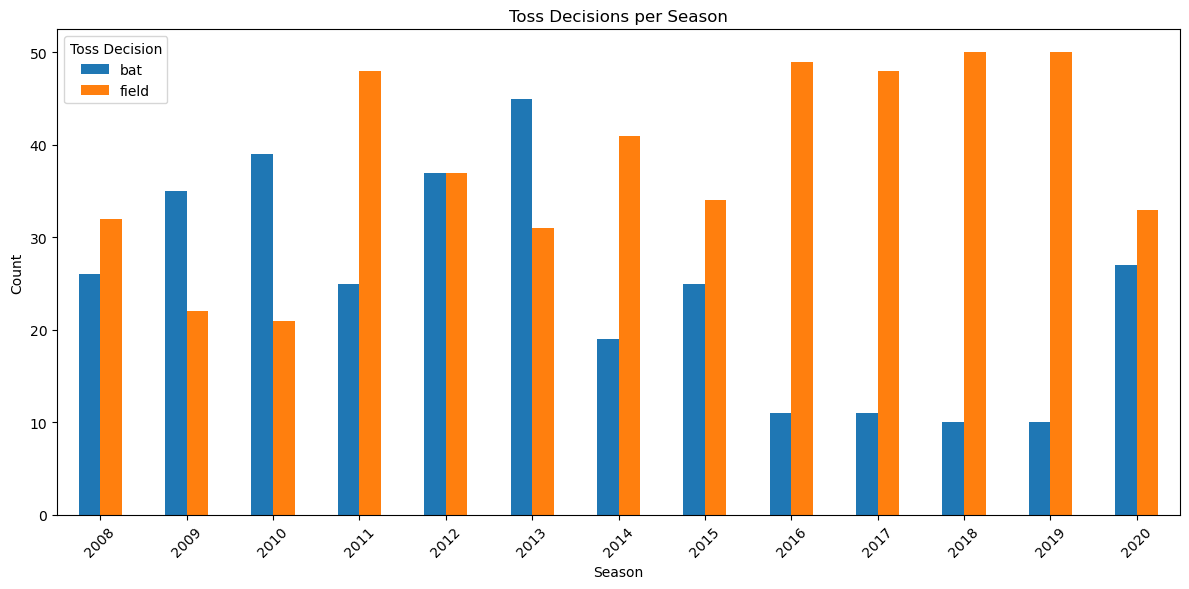

In [10]:
toss_decision_season.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Toss Decisions per Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

## 3. Analyse whether winning toss applies winning game or not

In [11]:
# Count where toss winner is also match winner
toss_wins_match = matches[matches['toss_winner'] == matches['winner']].shape[0]

# Total matches with result (no ties or no-result)
total_decided_matches = matches['winner'].notna().sum()

# Percentage
win_percent = (toss_wins_match / total_decided_matches) * 100

print(f"Matches where Toss Winner also won the Match: {toss_wins_match}")
print(f"Total Decided Matches: {total_decided_matches}")
print(f"Toss Win to Match Win Percentage: {win_percent:.2f}%")


Matches where Toss Winner also won the Match: 418
Total Decided Matches: 812
Toss Win to Match Win Percentage: 51.48%


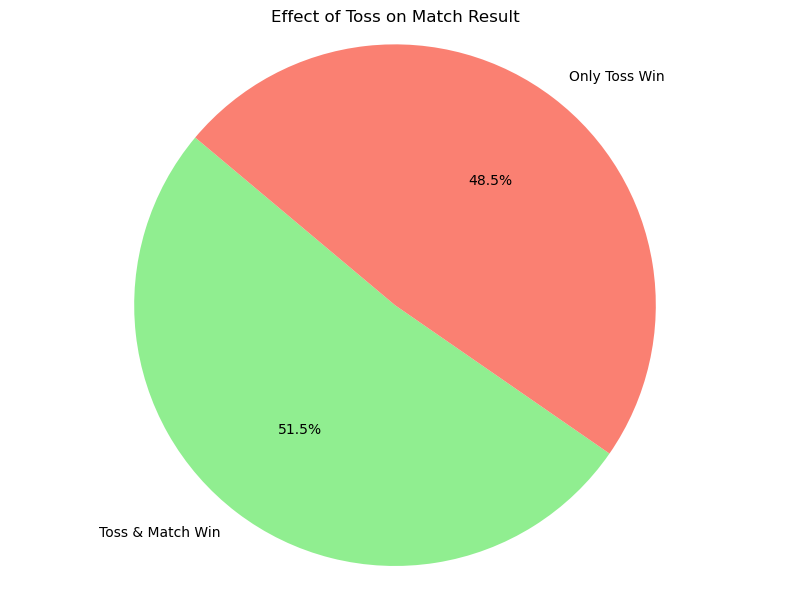

In [12]:
toss_win_match_win = matches[matches['toss_winner'] == matches['winner']].shape[0]

total_matches_with_result = matches['winner'].notna().sum()

plt.figure(figsize=(8, 6))
plt.pie(
    [toss_win_match_win, total_matches_with_result - toss_win_match_win],
    labels=['Toss & Match Win', 'Only Toss Win'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    startangle=140
)
plt.title('Effect of Toss on Match Result')
plt.axis('equal') 
plt.tight_layout()
plt.show()

## 4. Analyse which teams have won the tournament the most 

In [13]:
# Find final match of each season (assuming it's the last match of that season)
final_matches = matches.dropna(subset=['winner']).sort_values('date').groupby('season').tail(1)

# Count titles per team
title_counts = final_matches['winner'].value_counts()

print("IPL Titles by Team:\n", title_counts)


IPL Titles by Team:
 winner
Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64


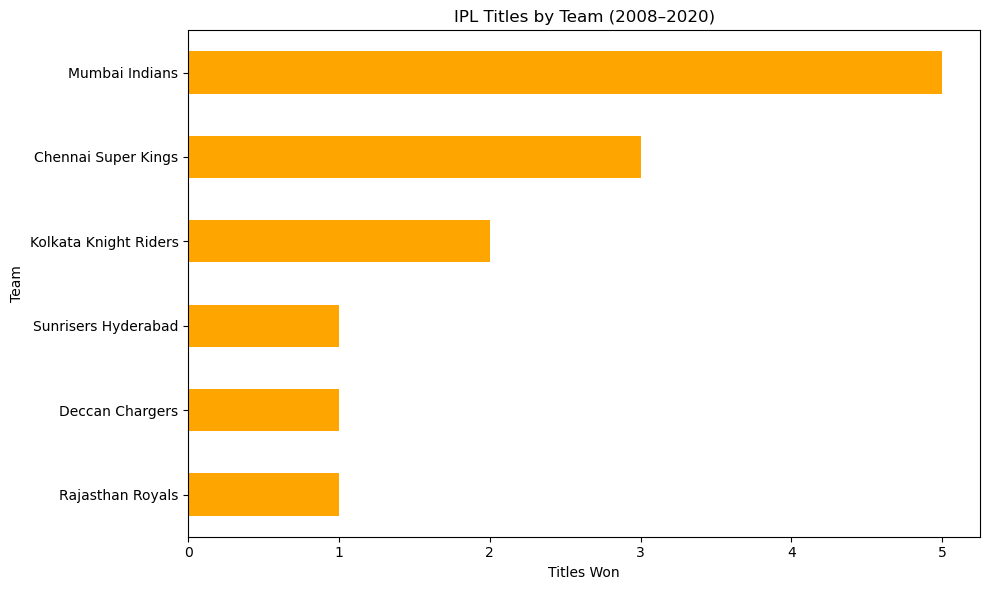

In [14]:
final_matches = matches.dropna(subset=['winner']).sort_values('date').groupby('season').tail(1)

tournament_wins = final_matches['winner'].value_counts()

plt.figure(figsize=(10, 6))
tournament_wins.sort_values(ascending=True).plot(
    kind='barh',
    color='orange'
)
plt.title('IPL Titles by Team (2008–2020)')
plt.xlabel('Titles Won')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


## 5. Comparitive analysis of teams

In [15]:
# Matches played already calculated as `team_matches`

# Wins by team
team_wins = matches['winner'].value_counts()

# Combine into one DataFrame
team_comparison = pd.DataFrame({
    'Matches Played': team_matches,
    'Matches Won': team_wins
}).fillna(0)

# Calculate win %
team_comparison['Win %'] = (team_comparison['Matches Won'] / team_comparison['Matches Played']) * 100
team_comparison = team_comparison.sort_values(by='Matches Played', ascending=False).round(2)

print("Comparative Analysis of Teams:\n", team_comparison)


Comparative Analysis of Teams:
                              Matches Played  Matches Won  Win %
Mumbai Indians                          203          120  59.11
Royal Challengers Bangalore             195           91  46.67
Kolkata Knight Riders                   192           99  51.56
Kings XI Punjab                         190           88  46.32
Chennai Super Kings                     178          106  59.55
Delhi Daredevils                        161           67  41.61
Rajasthan Royals                        161           81  50.31
Sunrisers Hyderabad                     124           66  53.23
Deccan Chargers                          75           29  38.67
Pune Warriors                            46           12  26.09
Delhi Capitals                           33           19  57.58
Gujarat Lions                            30           13  43.33
Rising Pune Supergiant                   16           10  62.50
Kochi Tuskers Kerala                     14            6  42.86
Rising P

In [16]:
comparison_df = pd.DataFrame({
    'Matches Played': team_matches,
    'Matches Won': team_wins
}).fillna(0)

comparison_df['Win %'] = (comparison_df['Matches Won'] / comparison_df['Matches Played']) * 100

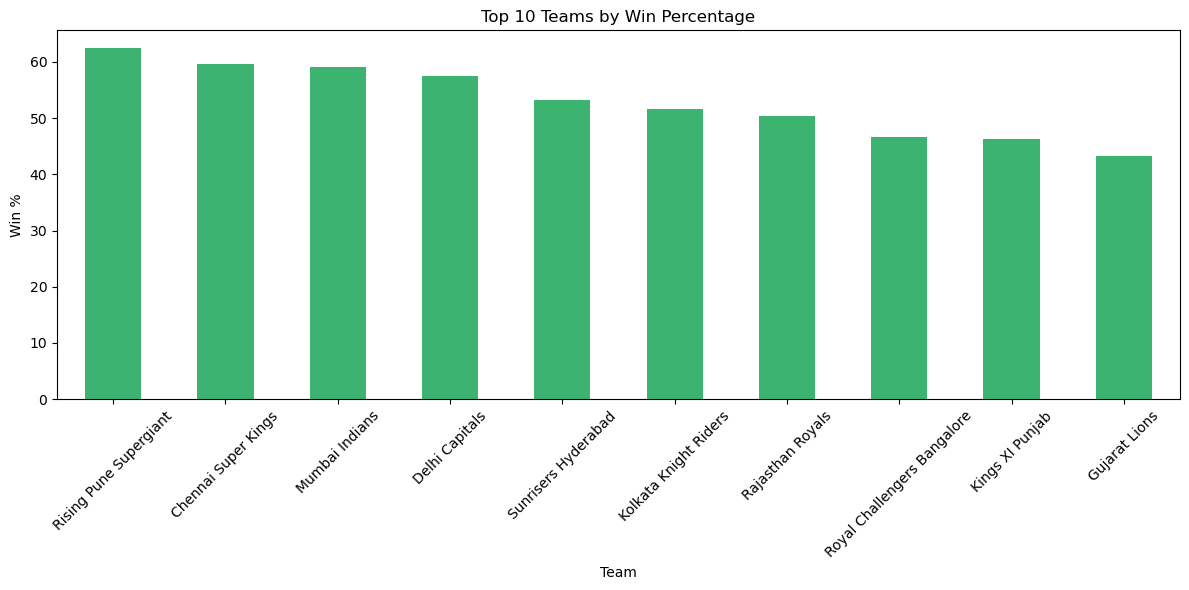

In [17]:
plt.figure(figsize=(12, 6))
comparison_df['Win %'].sort_values(ascending=False).head(10).plot(
    kind='bar',
    color='mediumseagreen'
)
plt.title('Top 10 Teams by Win Percentage')
plt.ylabel('Win %')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
